# Bike Station Locations and Boroughs

In [24]:
# import python modules
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/tabea/Documents/UrbanMobility/src')
from data import station_locations_fetching as locsFetch
from visualization import station_locations_vis as locsVis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. LOCATION AND BOROUGH FETCHING

### 1.1 Get Bike Station Locations

by extracting relevant information from API requests to tfl BikePoint data

In [2]:
bike_locs = locsFetch.get_station_locations()    

print(bike_locs.shape)
bike_locs.head(5)

(796, 4)


id                                  name        lat       lon
0  1            River Street , Clerkenwell  51.529163 -0.109970
1  2        Phillimore Gardens, Kensington  51.499606 -0.197574
2  3  Christopher Street, Liverpool Street  51.521283 -0.084605
3  4       St. Chad's Street, King's Cross  51.530059 -0.120973
4  5         Sedding Street, Sloane Square  51.493130 -0.156876

### 1.2 Add Boroughs Based on Station Location

by GET requests to 'findthatpostcode' API

In [4]:
# map borough to the bike locations
bike_locs['borough'] = bike_locs.apply(lambda row: locsFetch.get_borough(row['lat'], row['lon']), axis=1)
bike_locs.head(5)

id                                  name        lat       lon  \
0  1            River Street , Clerkenwell  51.529163 -0.109970   
1  2        Phillimore Gardens, Kensington  51.499606 -0.197574   
2  3  Christopher Street, Liverpool Street  51.521283 -0.084605   
3  4       St. Chad's Street, King's Cross  51.530059 -0.120973   
4  5         Sedding Street, Sloane Square  51.493130 -0.156876   

                  borough  
0               Islington  
1  Kensington and Chelsea  
2                 Hackney  
3                  Camden  
4  Kensington and Chelsea

### 1.3 Save Loactions

In [5]:

bike_locs.to_csv('../data/interim/station_locations_boroughs.csv', header=True, index=None)

# 2. EDA BIKE STATION LOCATIONS

In [ ]:
# import if already generated
# bike_locs = pd.read_csv('../data/interim/station_locations_boroughs.csv')

In [29]:
# london center coords
london_coords = (51.5074, -0.1278)

# count stations per borough
borough_counts = locsVis.count_stations_per_borough(bike_locs)

# define density colors
colormap = ["#f7fbff","#f6faff","#f5fafe","#f5f9fe","#f4f9fe","#f3f8fe","#f2f8fd","#f2f7fd","#f1f7fd","#f0f6fd","#eff6fc","#eef5fc","#eef5fc","#edf4fc","#ecf4fb","#ebf3fb","#eaf3fb","#eaf2fb","#e9f2fa","#e8f1fa","#e7f1fa","#e7f0fa","#e6f0f9","#e5eff9","#e4eff9","#e3eef9","#e3eef8","#e2edf8","#e1edf8","#e0ecf8","#e0ecf7","#dfebf7","#deebf7","#ddeaf7","#ddeaf6","#dce9f6","#dbe9f6","#dae8f6","#d9e8f5","#d9e7f5","#d8e7f5","#d7e6f5","#d6e6f4","#d6e5f4","#d5e5f4","#d4e4f4","#d3e4f3","#d2e3f3","#d2e3f3","#d1e2f3","#d0e2f2","#cfe1f2","#cee1f2","#cde0f1","#cce0f1","#ccdff1","#cbdff1","#cadef0","#c9def0","#c8ddf0","#c7ddef","#c6dcef","#c5dcef","#c4dbee","#c3dbee","#c2daee","#c1daed","#c0d9ed","#bfd9ec","#bed8ec","#bdd8ec","#bcd7eb","#bbd7eb","#b9d6eb","#b8d5ea","#b7d5ea","#b6d4e9","#b5d4e9","#b4d3e9","#b2d3e8","#b1d2e8","#b0d1e7","#afd1e7","#add0e7","#acd0e6","#abcfe6","#a9cfe5","#a8cee5","#a7cde5","#a5cde4","#a4cce4","#a3cbe3","#a1cbe3","#a0cae3","#9ec9e2","#9dc9e2","#9cc8e1","#9ac7e1","#99c6e1","#97c6e0","#96c5e0","#94c4df","#93c3df","#91c3df","#90c2de","#8ec1de","#8dc0de","#8bc0dd","#8abfdd","#88bedc","#87bddc","#85bcdc","#84bbdb","#82bbdb","#81badb","#7fb9da","#7eb8da","#7cb7d9","#7bb6d9","#79b5d9","#78b5d8","#76b4d8","#75b3d7","#73b2d7","#72b1d7","#70b0d6","#6fafd6","#6daed5","#6caed5","#6badd5","#69acd4","#68abd4","#66aad3","#65a9d3","#63a8d2","#62a7d2","#61a7d1","#5fa6d1","#5ea5d0","#5da4d0","#5ba3d0","#5aa2cf","#59a1cf","#57a0ce","#569fce","#559ecd","#549ecd","#529dcc","#519ccc","#509bcb","#4f9acb","#4d99ca","#4c98ca","#4b97c9","#4a96c9","#4895c8","#4794c8","#4693c7","#4592c7","#4492c6","#4391c6","#4190c5","#408fc4","#3f8ec4","#3e8dc3","#3d8cc3","#3c8bc2","#3b8ac2","#3a89c1","#3988c1","#3787c0","#3686c0","#3585bf","#3484bf","#3383be","#3282bd","#3181bd","#3080bc","#2f7fbc","#2e7ebb","#2d7dbb","#2c7cba","#2b7bb9","#2a7ab9","#2979b8","#2878b8","#2777b7","#2676b6","#2574b6","#2473b5","#2372b4","#2371b4","#2270b3","#216fb3","#206eb2","#1f6db1","#1e6cb0","#1d6bb0","#1c6aaf","#1c69ae","#1b68ae","#1a67ad","#1966ac","#1865ab","#1864aa","#1763aa","#1662a9","#1561a8","#1560a7","#145fa6","#135ea5","#135da4","#125ca4","#115ba3","#115aa2","#1059a1","#1058a0","#0f579f","#0e569e","#0e559d","#0e549c","#0d539a","#0d5299","#0c5198","#0c5097","#0b4f96","#0b4e95","#0b4d93","#0b4c92","#0a4b91","#0a4a90","#0a498e","#0a488d","#09478c","#09468a","#094589","#094487","#094386","#094285","#094183","#084082","#083e80","#083d7f","#083c7d","#083b7c","#083a7a","#083979","#083877","#083776","#083674","#083573","#083471","#083370","#08326e","#08316d","#08306b"]

# count stations per borough
stations_per_borough = locsVis.count_stations_per_borough(bike_locs) 

# color mapping dictionary
color_dict = locsVis.create_color_borough_mapping(colormap, borough_counts) 



### 2.1. Map: Visualize all Bike Station Locations

In [30]:
station_map = locsVis.create_station_map(bike_locs, london_coords)

# save the map as an HTML file
station_map.save('../reports/HTML_bike_station_locations/station_map.html')

# plot
display(station_map)

### 2.2 Bar Chart: Distribution of Bike Stations across Boroughs

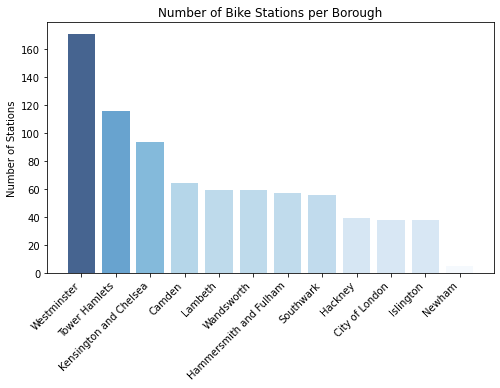

In [34]:
# create chart
barChart = locsVis.bar_chart_stations_per_borough(color_dict, stations_per_borough)

# save chart
barChart.savefig('../reports/figures/images_bike_station_locations/distribution_stations_across_boroughs.jpg')

# plot
barChart.show()

### 2.3 Map: Visualize Boroughs on Map

using same color scale by station counts

In [36]:
boroughs_geojson_path = 'https://skgrange.github.io/www/data/london_boroughs.json' 

# create map
borough_map = locsVis.create_borough_map(london_coords, boroughs_geojson_path, color_dict)

# save the map as an HTML file
borough_map.save('../reports/HTML_bike_station_locations/borough_map.html')

# plot
display(borough_map)

### 2.4. Visualize Locations and Borough on Map

In [38]:
# create map
borough_station_map = locsVis.create_borough_station_map(bike_locs, borough_map, "purple")

# save the map as an HTML file
borough_station_map.save('../reports/HTML_bike_station_locations/borough_station_map.html')

# plot
display(borough_station_map)